In [426]:
# pip install matplotlib

In [427]:
# pip install seaborn

In [428]:

# import all needed libraries

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score
from sklearn.metrics import confusion_matrix, classification_report




In [429]:
# read csv file using pandas

df=pd.read_csv('Book0.1.csv')
df.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
1,2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
2,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
3,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
4,5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30,5.5,7.4,81,1.5,0.1,2853,4049,2014


In [430]:
# no need this because it give value error of continuous value error 
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [431]:
l=['Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']
df[df[l]=="NAN"]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [432]:
# drop the all nan and empty data

for i in l:
    df.drop(df.index[df[i]=="NAN"],inplace=True,axis=0)
    df.drop(df.index[df[i]==" "],inplace=True,axis=0)

In [433]:
# convert all data type into float

for i in l:
    df[i]=df[i].astype('float')

In [434]:
df.describe()

,STATION CODE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,8.790000e+02,8.790000e+02,879.000000
mean,2194.318544,26.093743,6.310728,7.232628,1650.803185,4.924061,1.644994,6.869346e+05,1.110502e+06,2012.559727
std,807.389674,3.261618,1.300479,0.606125,4927.777303,12.770214,2.896984,1.209315e+07,2.069025e+07,1.102190
min,17.000000,16.000000,0.200000,2.600000,27.000000,0.100000,0.000000,2.000000e+00,4.000000e+00,2010.000000
25%,1548.000000,24.450000,5.900000,6.950000,75.000000,1.200000,0.280000,2.550000e+01,9.000000e+01,2012.000000
50%,2290.000000,27.000000,6.700000,7.200000,159.000000,1.800000,0.590000,1.990000e+02,5.000000e+02,2013.000000
75%,2708.000000,28.400000,7.100000,7.600000,505.500000,3.300000,1.775000,9.965000e+02,2.425000e+03,2014.000000
max,3473.000000,33.000000,9.900000,8.400000,37227.000000,185.800000,20.300000,2.725216e+08,5.110909e+08,2014.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


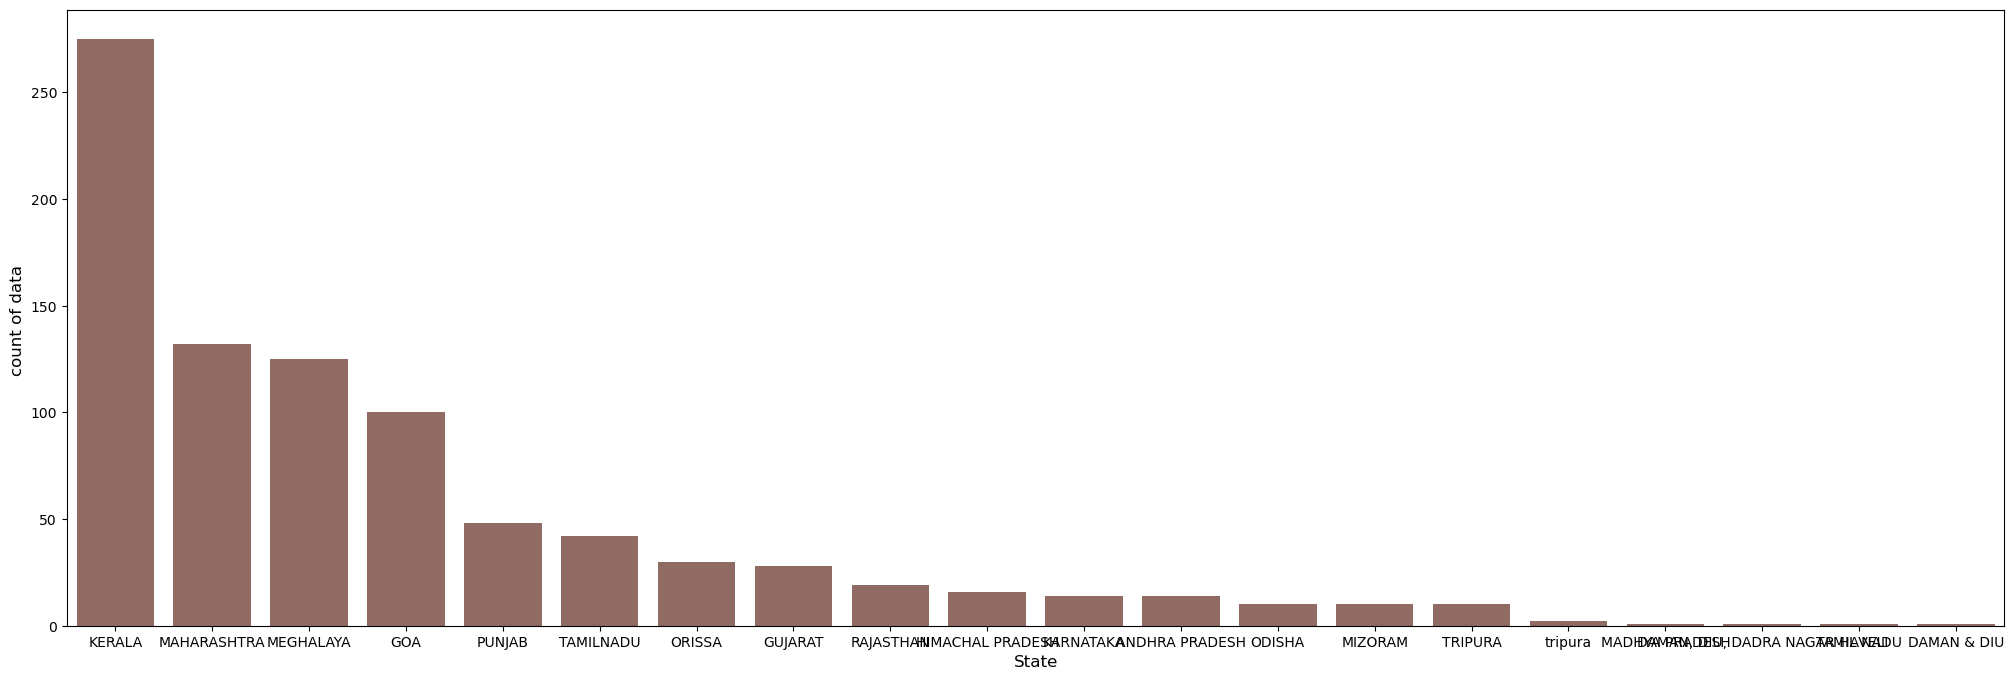

In [435]:
# viewing the column of state 

color=sns.color_palette()

int_level = df['STATE'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[5])
plt.ylabel('count of data ',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


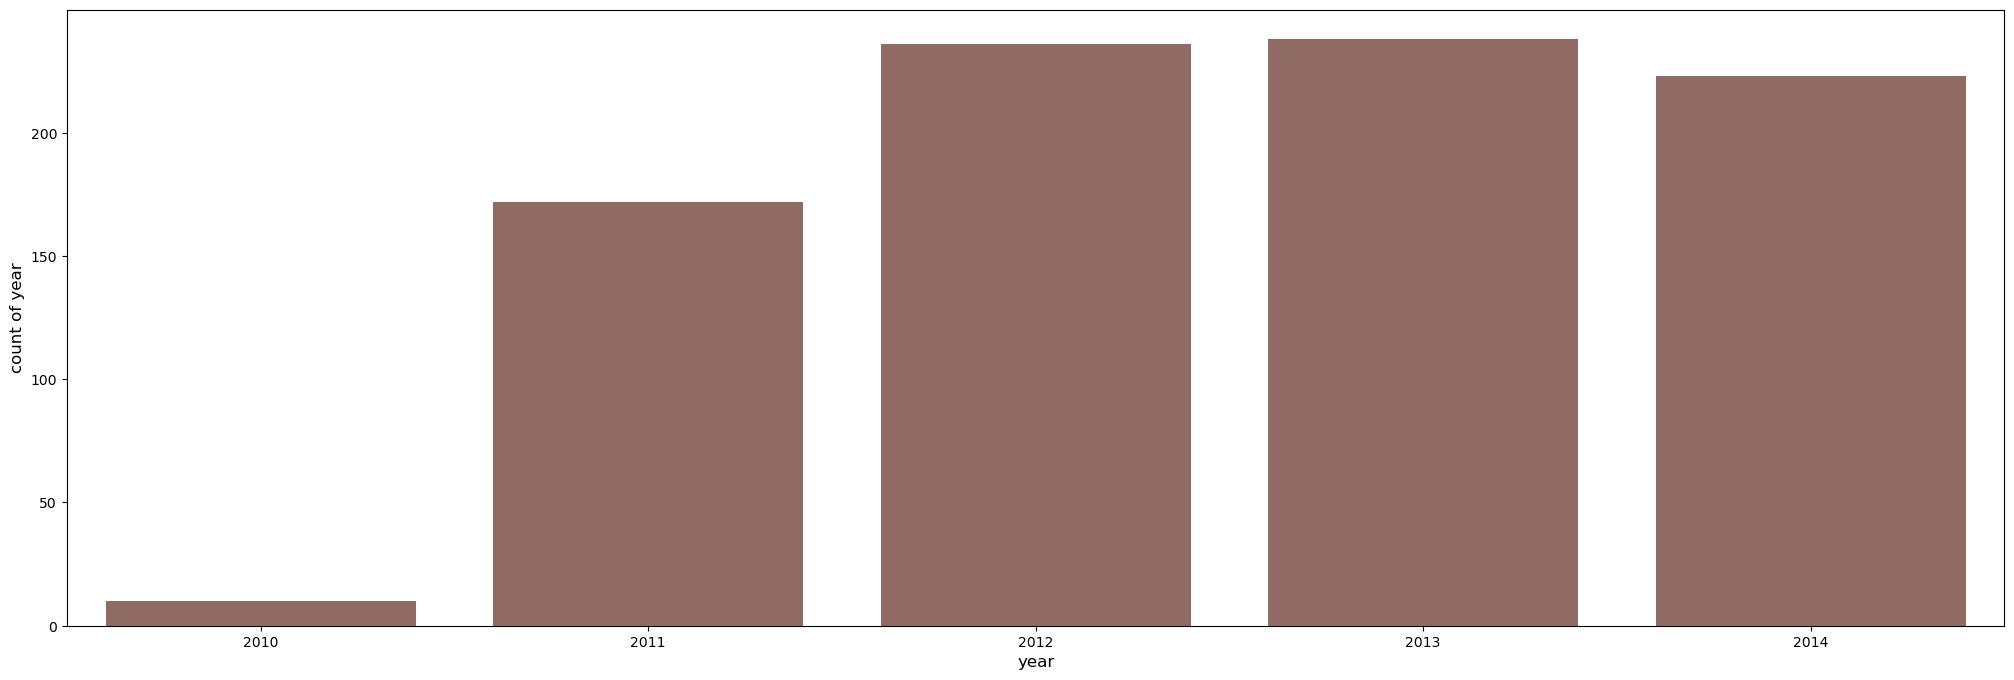

In [436]:
# viewing the column data of year

color=sns.color_palette()

int_level = df['year'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[5])
plt.ylabel('count of year',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.show()

Text(0.5, 1.0, 'Travil')

<Figure size 2000x2000 with 0 Axes>

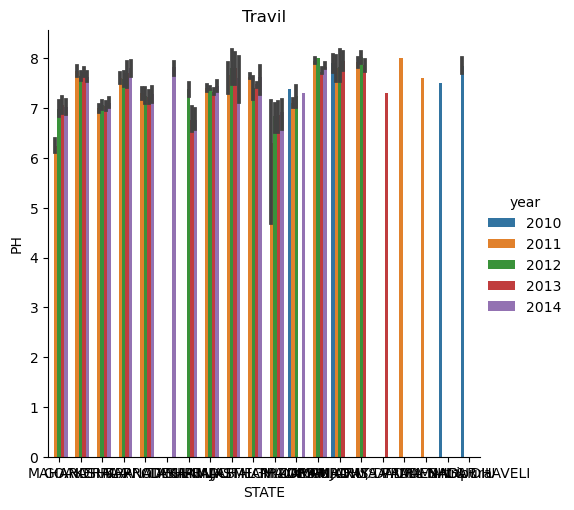

In [437]:
# State and year comparision with ph rate

plt.figure(figsize=(20,20))
g=sns.catplot(data=df,kind="bar",x="STATE",y="PH",hue="year")
plt.title("Travil")

<AxesSubplot:ylabel='year'>

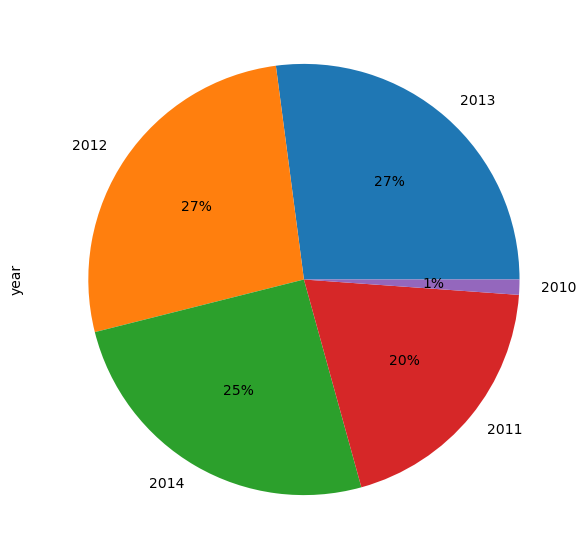

In [438]:
df['year'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.0f%%')

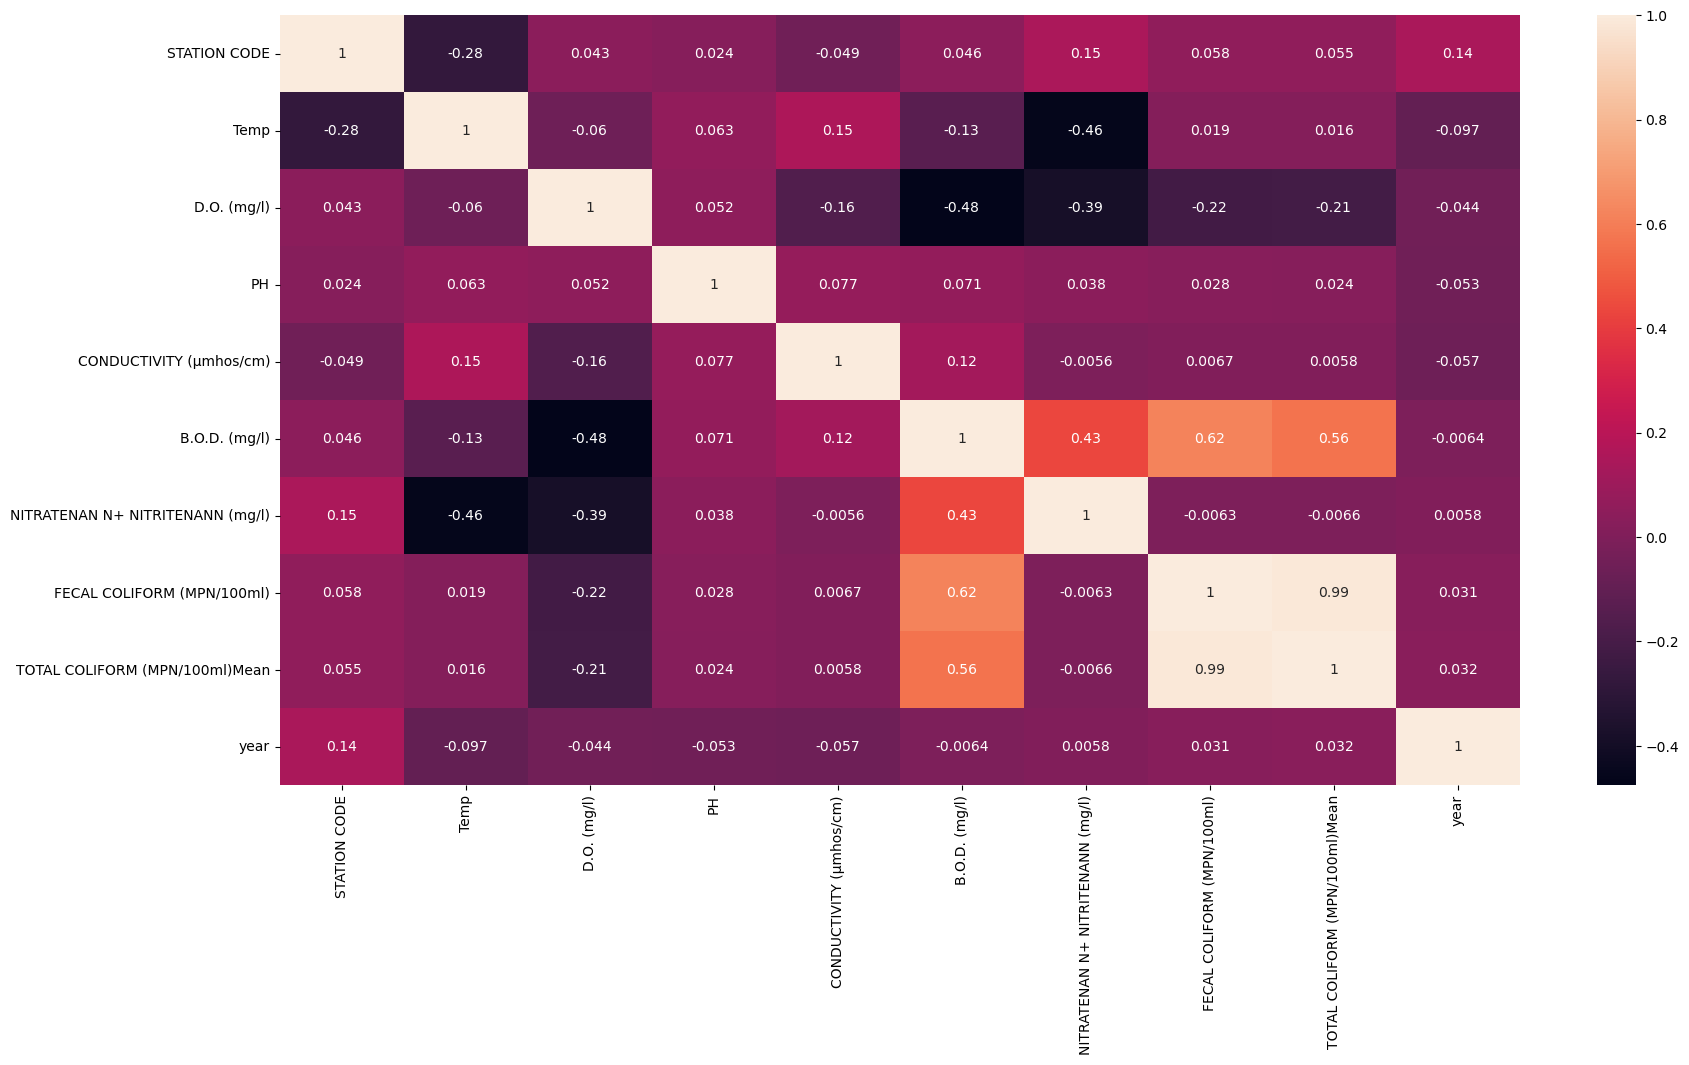

In [439]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [440]:
# Create column for the pure water range and split with undrikingable water

df['PH Range']=pd.cut(x=df['PH'],bins=[0,6.49,7.5,14],labels=['0-6.49','6.5-7.5','7.5-14'])
df['Water Qu']=df['PH Range'].map({'6.5-7.5':1,'7.5-14':0,'0-6.49':0})

df.drop(df.index[df['PH Range']=="NaN"],inplace=True,axis=0)


In [441]:
df.describe()

,STATION CODE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,Water Qu
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,8.790000e+02,8.790000e+02,879.000000,879.000000
mean,2194.318544,26.093743,6.310728,7.232628,1650.803185,4.924061,1.644994,6.869346e+05,1.110502e+06,2012.559727,0.673493
std,807.389674,3.261618,1.300479,0.606125,4927.777303,12.770214,2.896984,1.209315e+07,2.069025e+07,1.102190,0.469202
min,17.000000,16.000000,0.200000,2.600000,27.000000,0.100000,0.000000,2.000000e+00,4.000000e+00,2010.000000,0.000000
25%,1548.000000,24.450000,5.900000,6.950000,75.000000,1.200000,0.280000,2.550000e+01,9.000000e+01,2012.000000,0.000000
50%,2290.000000,27.000000,6.700000,7.200000,159.000000,1.800000,0.590000,1.990000e+02,5.000000e+02,2013.000000,1.000000
75%,2708.000000,28.400000,7.100000,7.600000,505.500000,3.300000,1.775000,9.965000e+02,2.425000e+03,2014.000000,1.000000
max,3473.000000,33.000000,9.900000,8.400000,37227.000000,185.800000,20.300000,2.725216e+08,5.110909e+08,2014.000000,1.000000


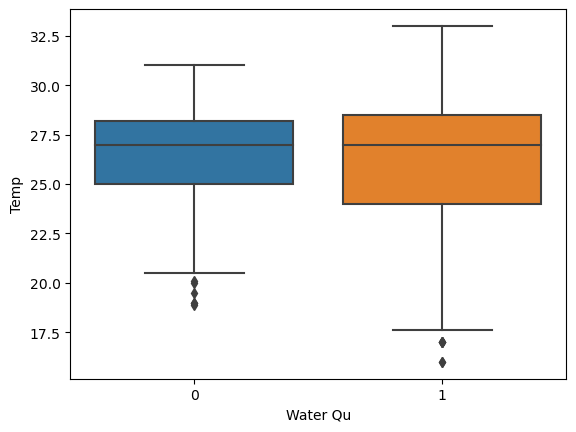

count    879.000000
mean      26.093743
std        3.261618
min       16.000000
25%       24.450000
50%       27.000000
75%       28.400000
max       33.000000
Name: Temp, dtype: float64





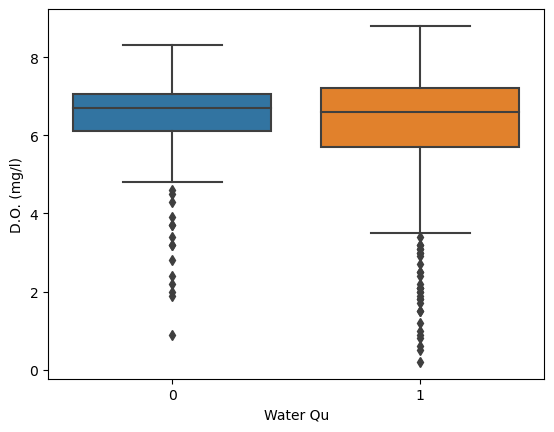

count    878.000000
mean       6.306640
std        1.295557
min        0.200000
25%        5.900000
50%        6.700000
75%        7.100000
max        8.800000
Name: D.O. (mg/l), dtype: float64





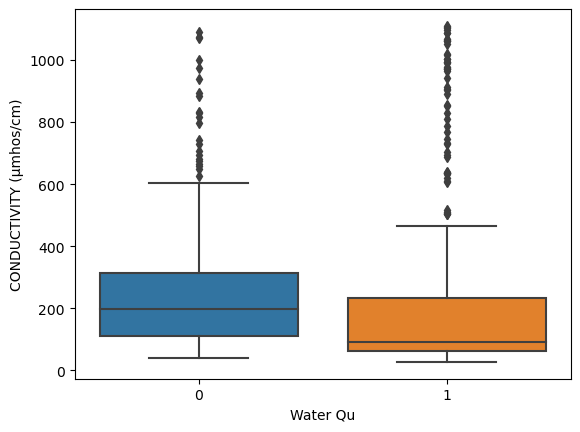

count     745.000000
mean      222.344966
std       243.275990
min        27.000000
25%        69.000000
50%       120.000000
75%       274.000000
max      1110.000000
Name: CONDUCTIVITY (µmhos/cm), dtype: float64





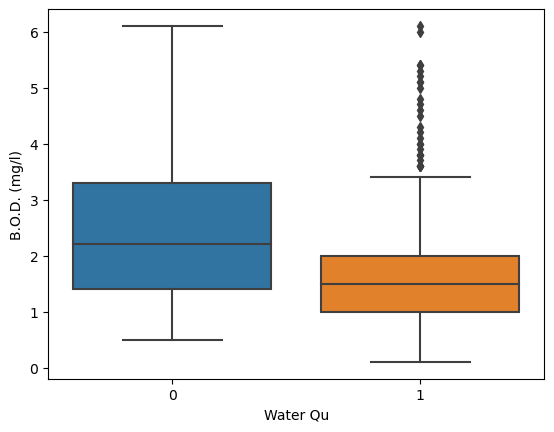

count    675.000000
mean       1.939630
std        1.140444
min        0.100000
25%        1.100000
50%        1.600000
75%        2.500000
max        6.100000
Name: B.O.D. (mg/l), dtype: float64





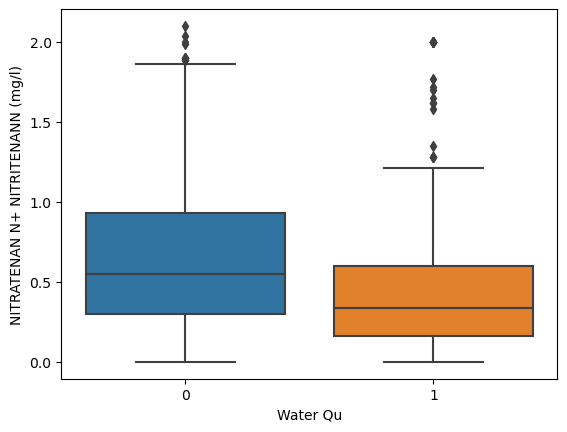

count    571.000000
mean       0.523135
std        0.451816
min        0.000000
25%        0.200000
50%        0.400000
75%        0.720000
max        2.100000
Name: NITRATENAN N+ NITRITENANN (mg/l), dtype: float64





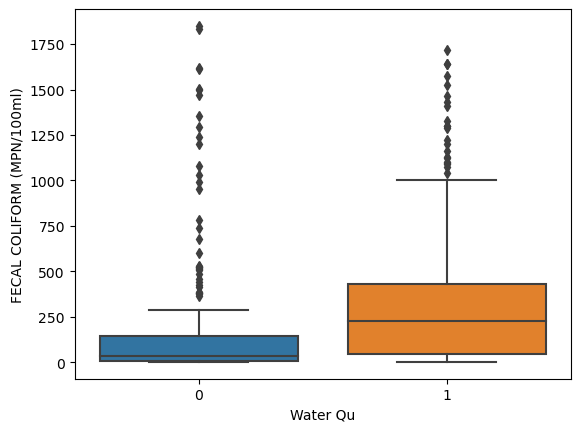

count     486.000000
mean      284.436214
std       383.079776
min         2.000000
25%        22.000000
50%       131.500000
75%       380.750000
max      1850.000000
Name: FECAL COLIFORM (MPN/100ml), dtype: float64


In [442]:
# Box plot for comparing the ph with other column and finding the outliers


col_pruning=['Temp','D.O. (mg/l)','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)']

for col in col_pruning:
    print("\n\n")
    coldesc=df[col].describe()
    col_IQR=coldesc[6]-coldesc[4]
    col_Lower=coldesc[4]-(1.5*col_IQR)

    col_Higher=coldesc[6]+(1.5*col_IQR)

#     print(col_Lower,col_Higher)
#     df.drop(df.index[(df[col]<col_Lower) + (df[col]>col_Higher)],inplace=True,axis=0)
    df.drop(df.index[(df[col]>col_Higher)],inplace=True,axis=0)
    sns.boxplot(x='Water Qu',y=df[col],data=df)
    plt.show()
    
    
    print(df[col].describe())

In [443]:
df.drop(['year'],inplace=True,axis=1)

In [444]:
df.drop(['STATION CODE','LOCATIONS','STATE','PH Range','Water Qu'],inplace=True,axis=1)

In [445]:
# transforming your data so that it fits within a specific scale

mm=MinMaxScaler()
df[l]=mm.fit_transform(df[l])
df.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.600061,0.724280,0.813046,0.147103,0.307922,0.254203,0.152833,0.013122
std,0.157548,0.118957,0.101386,0.177769,0.204720,0.214196,0.207294,0.047275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534091,0.695122,0.754386,0.038853,0.150000,0.095238,0.010823,0.001265
50%,0.629870,0.743902,0.807018,0.077706,0.233333,0.190476,0.070076,0.005544
75%,0.701299,0.792683,0.877193,0.184089,0.450000,0.351190,0.204951,0.014127
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


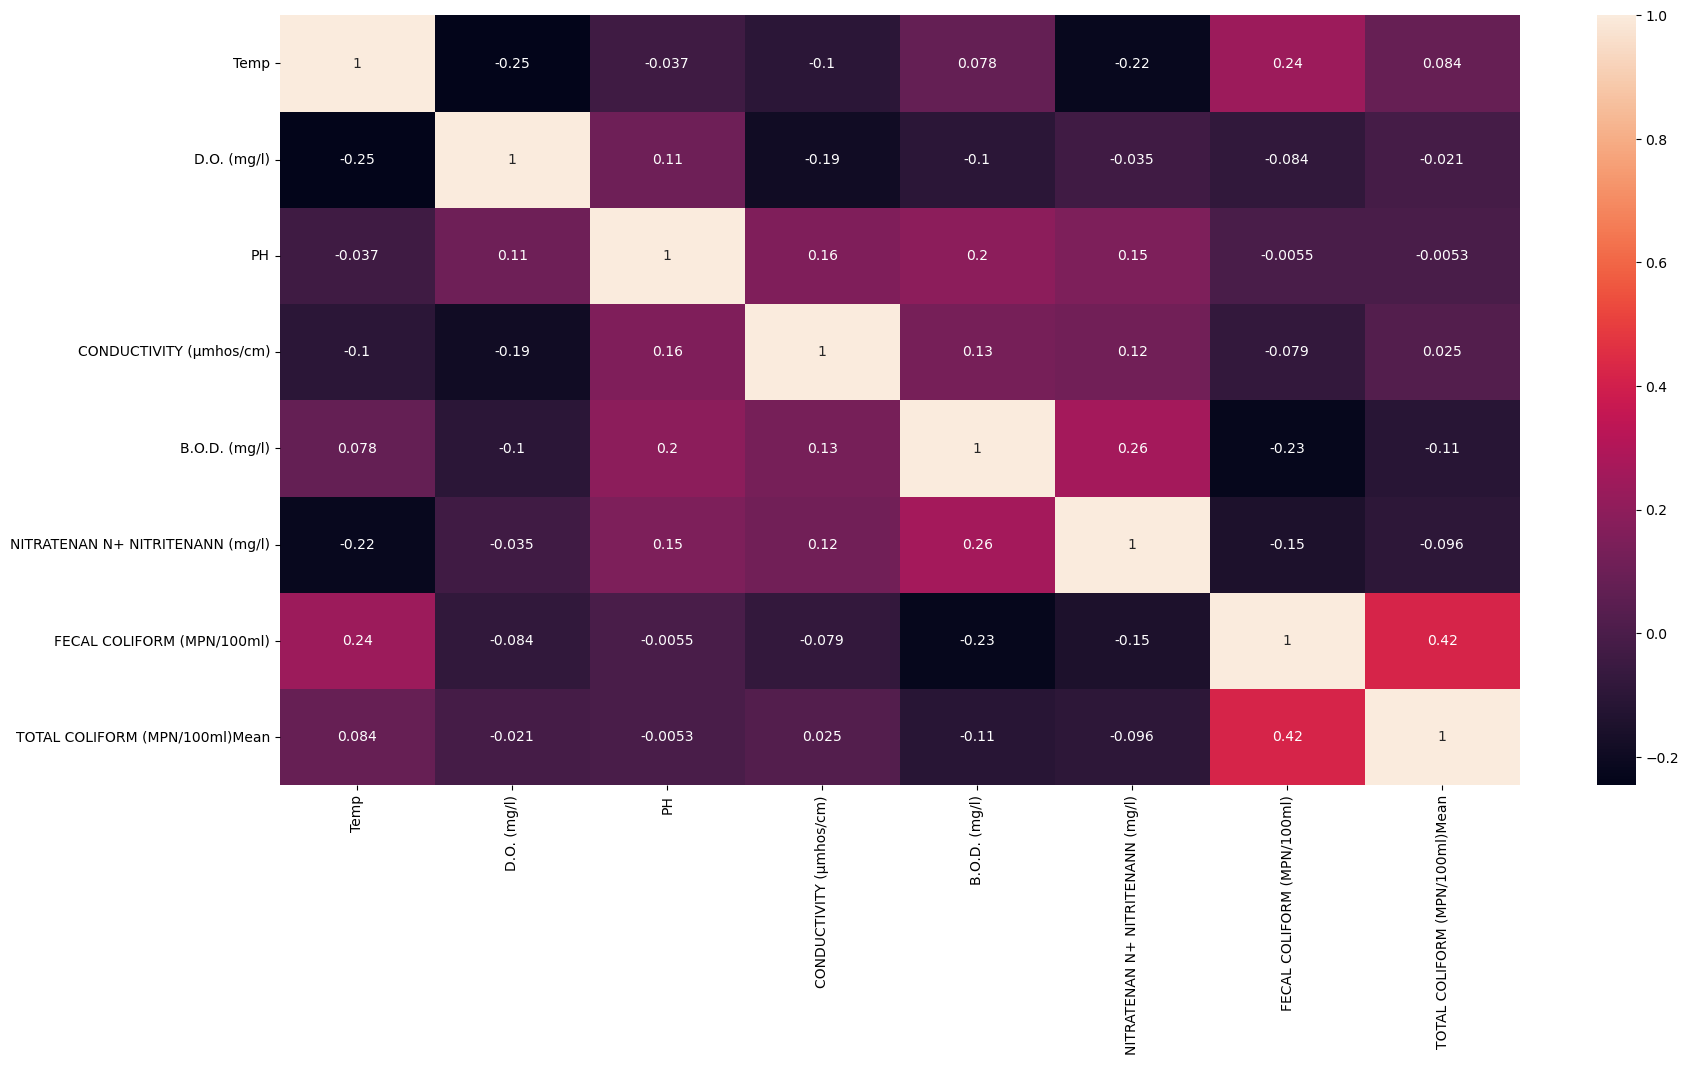

In [446]:
# Heat map for finding the corrlation between columns 

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [447]:
df

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
14,0.740260,0.817073,0.771930,0.203515,0.233333,0.095238,0.591450,0.036895
15,0.746753,0.817073,0.771930,0.148936,0.150000,0.047619,0.694805,0.045859
26,0.811688,0.719512,0.859649,0.358927,0.316667,0.047619,0.466450,0.023110
28,0.487013,0.731707,0.912281,0.062905,0.800000,0.095238,0.007576,0.000482
29,0.779221,0.768293,0.929825,0.066605,0.816667,0.190476,0.007035,0.000452
...,...,...,...,...,...,...,...,...
882,0.370130,0.756098,0.789474,0.239593,0.200000,0.052381,0.003247,0.000377
883,0.714286,0.695122,0.947368,0.126735,0.550000,0.142857,0.204545,0.007894
884,0.707792,0.731707,0.929825,0.156337,0.716667,0.380952,0.228896,0.009702
893,0.675325,0.682927,0.894737,0.137835,0.566667,0.095238,0.286797,0.008858


In [448]:
l=['Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']
split=l.copy()
y=df['PH']
split.remove('PH')
x=df[split]

### Split the Data

In [449]:
#  train and test date spliting 

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42) 
 

In [450]:
x_train

,Temp,D.O. (mg/l),CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
795,0.577922,0.804878,0.023127,0.083333,0.071429,0.160173,0.010290
105,0.623377,0.560976,0.025902,0.083333,0.333333,0.091450,0.004655
355,0.785714,0.573171,0.066605,0.450000,0.376190,0.056277,0.007819
830,0.662338,0.682927,0.015726,0.100000,0.100000,0.385823,0.024496
775,0.500000,0.768293,0.164662,0.350000,0.442857,0.000000,0.000768
...,...,...,...,...,...,...,...
226,0.642857,0.573171,0.730805,0.450000,0.476190,0.003788,0.000286
532,0.545455,0.731707,0.037003,0.166667,0.252381,0.147727,0.010033
661,0.415584,0.658537,0.407956,0.216667,0.204762,0.001623,0.000181
808,0.584416,0.817073,0.024977,0.200000,0.195238,0.223485,0.013694


In [451]:
# print(list(x_train.iloc[1]))

## LinearRegression

In [452]:
# fit the Linear regression model 

regressor= LinearRegression()  
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)  
# x_pred= regressor.predict(x_train)

In [453]:
ypred_pd=pd.DataFrame({'WQ':y_test.values,'WQ_Pred':y_pred})
ypred_pd['predicted']=ypred_pd['WQ_Pred'].map(lambda x:1 if x>0.5 else 0)
ypred_pd['WQ']=ypred_pd['WQ'].map(lambda x:1 if x>0.7 else 0)
ypred_pd.head()

,WQ,WQ_Pred,predicted
0,1,0.795986,1
1,1,0.845279,1
2,1,0.789093,1
3,1,0.802417,1
4,1,0.861372,1


In [454]:
confusion=confusion_matrix(ypred_pd['WQ'],ypred_pd['predicted'])
print(confusion)

[[  0   8]
 [  0 114]]


In [455]:
print(accuracy_score(ypred_pd['WQ'],ypred_pd['predicted']))

0.9344262295081968


# Decision Tree

In [456]:
# Fit the desiontree regression

clf_gini = DecisionTreeRegressor(random_state = 0)

clf_gini.fit(x_train, y_train)

y_pred = clf_gini.predict(x_test)


In [457]:
ypred_pd=pd.DataFrame({'WQ':y_test.values,'WQ_Pred':y_pred})
ypred_pd['predicted']=ypred_pd['WQ_Pred'].map(lambda x:1 if x>0.7 else 0)
ypred_pd['WQ']=ypred_pd['WQ'].map(lambda x:1 if x>0.7 else 0)
ypred_pd.head()

,WQ,WQ_Pred,predicted
0,1,0.947368,1
1,1,0.947368,1
2,1,0.736842,1
3,1,0.789474,1
4,1,0.719298,1


In [458]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(ypred_pd['WQ'],ypred_pd['predicted'])))

Model accuracy score with criterion gini index: 0.9180


# Random Forest 

In [459]:
# Fit the random forest regression

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
melb_preds = forest_model.predict(x_test)

# print(mean_absolute_error(val_y, melb_preds))

In [460]:
ypred_pd=pd.DataFrame({'WQ':y_test.values,'WQ_Pred':y_pred})
ypred_pd['predicted']=ypred_pd['WQ_Pred'].map(lambda x:1 if x>0.7 else 0)
ypred_pd['WQ']=ypred_pd['WQ'].map(lambda x:1 if x>0.7 else 0)
ypred_pd.head()

,WQ,WQ_Pred,predicted
0,1,0.947368,1
1,1,0.947368,1
2,1,0.736842,1
3,1,0.789474,1
4,1,0.719298,1


In [461]:
print(accuracy_score(ypred_pd['WQ'],ypred_pd['predicted']))


0.9180327868852459


# Linear regression has the highest accuracy score = 0.93442

# Pickle

In [462]:
# Load the model into pickle for serializing and deserializing a Python object structure

In [463]:
import pickle

In [464]:
with open('model_pkl', 'wb') as files:
    pickle.dump(regressor, files)
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
lr.predict([list(x_train.iloc[1])])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.74676269])

In [465]:
with open('model_pkl', 'wb') as files:
    pickle.dump(clf_gini, files)
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
lr.predict([list(x_train.iloc[1])])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.73684211])

In [466]:
with open('model_pkl', 'wb') as files:
    pickle.dump(forest_model, files)
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
lr.predict([list(x_train.iloc[1])])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.74894737])